In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('/Users/CRYPTO/Infosys Internship - Hate Speech Detection/Tokenization & Encoding/Reddit_Encoded.csv')
print(df.head())

                                             comment  hate_speech  \
0  subsection retarded hungarians ohh boy brace l...            1   
1  hiii just got work Foundation and grounding ma...            0   
2                    wow guess soyboys every country            0   
3  owen benjamins soyboy song goes every country ...            0   
4   yall hear sumn means live small town rn for w...            0   

                                  lemmatized_comment  \
0  subsection retard hungarians ohh boy brace liv...   
1  hiii just get work Foundation and ground mainl...   
2                    wow guess soyboys every country   
3  owen benjamins soyboy song go every country amaze   
4  yall hear sumn mean live small town rn for wor...   

                                document_vector_flat  
0  0.014043219,-0.01809359,0.017145459,0.08062436...  
1  -0.0030388932,-0.035133556,0.020659983,0.07383...  
2  0.017362628,0.005587179,0.0297773,0.109146975,...  
3  0.018085241,0.0011954829,

In [3]:
# Convert the document vectors from their string representation back into numerical form
df['document_vector'] = df['document_vector_flat'].apply(lambda x: np.fromstring(x, sep=','))
print(df['document_vector'].head())

0    [0.014043219, -0.01809359, 0.017145459, 0.0806...
1    [-0.0030388932, -0.035133556, 0.020659983, 0.0...
2    [0.017362628, 0.005587179, 0.0297773, 0.109146...
3    [0.018085241, 0.0011954829, 2.8959475e-05, 0.0...
4    [0.023993038, -0.00060867134, 0.005239945, 0.0...
Name: document_vector, dtype: object


In [4]:
# Extract features (document vectors) and labels (binary hate speech)
X = np.array(df['document_vector'].tolist())
y = df['hate_speech']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [6]:
model = Sequential()
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Train the LSTM model
history = model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.6642 - loss: 0.6093 - val_accuracy: 0.5388 - val_loss: 0.6446
Epoch 2/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.7625 - loss: 0.4919 - val_accuracy: 0.5176 - val_loss: 0.7497
Epoch 3/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.7788 - loss: 0.4606 - val_accuracy: 0.5857 - val_loss: 0.6820
Epoch 4/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.7998 - loss: 0.4362 - val_accuracy: 0.6262 - val_loss: 0.6425
Epoch 5/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8091 - loss: 0.4179 - val_accuracy: 0.6725 - val_loss: 0.5909
Epoch 6/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.8122 - loss: 0.4112 - val_accuracy: 0.7240 - val_loss: 0.5370
Epoch 7/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8234 - loss: 0.3925 - val_accuracy: 0.7490 - val_loss: 0.5043
Epoch 8/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8298 - loss: 0.3885 - 

339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9285 - loss: 0.1974 - val_accuracy: 0.9419 - val_loss: 0.2004


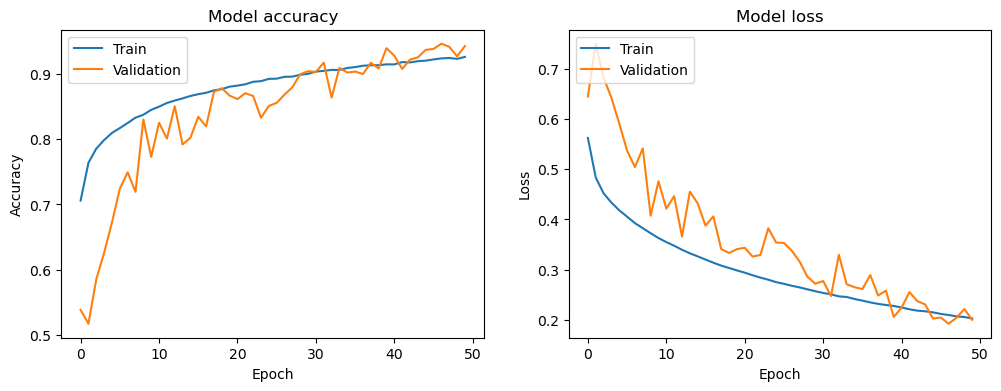

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [9]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step


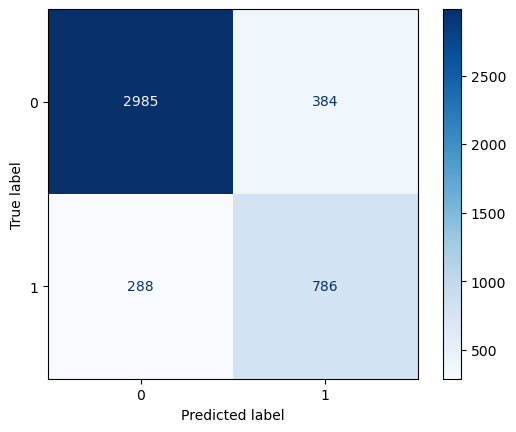

In [10]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [12]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8488
Precision: 0.6718
Recall: 0.7318
F1 Score: 0.7005
